# Data Preprocessing

### Import relevant libraries

In [1]:
import pandas as pd
import datetime

### Import and build news data

In [2]:
news_data = pd.read_csv('BR_News.txt', names = ['Date', 'News'], index_col = 0) #Original raw data file

In [3]:
news_data1 = pd.read_csv('Dawn_News.txt', names = ['Date', 'News'], index_col = 0) #Original raw data file

In [4]:
news_data['Sentiment'] = [0 for i in range(len(news_data))] #Initialize polarities to zero

In [5]:
news_data1['Sentiment'] = [0 for i in range(len(news_data1))] #Initialize polarities to zero

In [6]:
news_data.drop_duplicates(subset ="News", 
                     keep = False, inplace = True) 
  

In [7]:
news_data1.drop_duplicates(subset ="News", 
                     keep = False, inplace = True) 
  

In [8]:
news_data = news_data.iloc[1:]
news_data.head()

,Date,News,Sentiment
1,2011-04-05,"China to invest in hydel, renewable energy pow...",0
2,2011-04-06,Govt mulling to empower eight public sector en...,0
3,2011-04-06,"China offers financial, technical assistance f...",0
4,2011-04-06,Shipping activity at Port Qasim - KARACHI: Shi...,0
5,2011-04-06,Rupee gains vs dollar on healthy inflows; stoc...,0


In [9]:
news_data['Date'] = pd.to_datetime(news_data['Date']) #Convert to datetime
news_data['Date'] = news_data["Date"].dt.strftime("%d %m %Y") #Format date
news_data['News'].map(str) #Convert news to string

1        China to invest in hydel, renewable energy pow...
2        Govt mulling to empower eight public sector en...
3        China offers financial, technical assistance f...
4        Shipping activity at Port Qasim - KARACHI: Shi...
5        Rupee gains vs dollar on healthy inflows; stoc...
                               ...                        
58984    90pc criminals acquitted due to faulty investi...
58985    Regulatory bodies: AGP to begin audit decision...
58986    Northern South Asian region: Goethe-Institut h...
58987    Buzdar making efforts to woo opposition MPAs a...
58988    DS inspects KCR track - KARACHI: The newly app...
Name: News, Length: 57995, dtype: object

In [10]:
news_data1['Date'] = pd.to_datetime(news_data1['Date']) #Convert to datetime
news_data1['Date'] = news_data1["Date"].dt.strftime("%d %m %Y") #Format date
news_data1['News'].map(str) #Convert news to string

0             Judgment on judges` extension case suspended
1             Gilani hints at giving subsidy on oil prices
2           Agencies averse to aerial survey by foreigners
3        SC gives PPP leaders time to file reply in con...
4          Quake measuring 5.2 rattles Islamabad, Mansehra
                               ...                        
28590    Tabuk governor arrives in Dalbandin to hunt ho...
28591    Broadsheet commission to probe other cases as ...
28593    Opposition slams move to bring Senate polls bi...
28594    SC issues notice to NAB on Zardari’s pleas for...
28595    Japan to provide $4.57m grant to help procure ...
Name: News, Length: 23006, dtype: object

In [11]:
news_data1.drop_duplicates(subset = 'News', keep = False, inplace = True)


In [12]:
news_data.reset_index(drop = True, inplace = True)

In [13]:
news_data1.reset_index(drop = True, inplace = True)

### Import and stock prices as daily difference

In [14]:
diff = pd.read_csv('Module1/Input/Difference/ABOT PA Equity.csv')

In [15]:
diff.describe()

,Open,High,Low,Close,Volume
count,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.147057,0.149578,0.145137,0.147993,5.805895
std,8.392596,6.892363,7.040883,6.328886,62090.918356
min,-88.884400,-58.971300,-41.226500,-45.014800,-925733.000000
25%,-0.763300,-0.825200,-0.660600,-0.731900,-3408.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.854600,0.882200,0.811400,0.757100,3200.000000
max,83.756400,43.741300,52.988800,52.143600,918700.000000


In [16]:
diff['Date'] = pd.to_datetime(diff['Date']) #Convert date to datetime

In [17]:
diff.head()

,Open,High,Low,Close,Volume,Date
0,0.0,0.0,0.0,0.0,0.0,2001-01-03
1,0.0,0.0,0.0,0.0,0.0,2001-01-04
2,0.0,0.0,0.0,0.0,0.0,2001-01-05
3,0.0,0.0,0.0,0.0,0.0,2001-01-08
4,0.0,0.0,0.0,0.0,0.0,2001-01-09


In [18]:
diff.tail()

,Open,High,Low,Close,Volume,Date
5152,0.99,-1.0,0.00,-11.20,250.0,2020-10-02
5153,-6.00,-1.0,-33.00,-3.58,25250.0,2020-10-05
5154,-10.00,-9.0,23.00,-2.12,-22950.0,2020-10-06
5155,19.55,11.0,0.05,13.62,12700.0,2020-10-07
5156,6.45,9.0,16.05,6.78,6600.0,2020-10-08


In [19]:
diff.describe()

,Open,High,Low,Close,Volume
count,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.147057,0.149578,0.145137,0.147993,5.805895
std,8.392596,6.892363,7.040883,6.328886,62090.918356
min,-88.884400,-58.971300,-41.226500,-45.014800,-925733.000000
25%,-0.763300,-0.825200,-0.660600,-0.731900,-3408.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.854600,0.882200,0.811400,0.757100,3200.000000
max,83.756400,43.741300,52.988800,52.143600,918700.000000


### Make relevant functions to map polarities and take into account weekends

In [20]:
def pol(val, mean, std):
    #print(val)
    if val >= (mean + std)*0.3:
        
        return 1
    
    elif val < (mean-std)*0.3:
        
        return -1
    
    else:
        
        return 0

# Year, month, day	
def check(x):
    d3 = datetime.datetime.strptime(x, '%d %m %Y')
    d2 = datetime.datetime.strptime(x, '%d %m %Y').weekday()
   # print(d3)
    ##print(d2)

    if (d2 == 5):
        d1 = d3 - datetime.timedelta(days = 1)
    elif (d2 == 6):
        d1 = d3 - datetime.timedelta(days = 2)
    else:
        d1 = d3
    #print(d1)    
    return d1


check('08 02 2009')

datetime.datetime(2009, 2, 6, 0, 0)

In [21]:
news_data.head()


,Date,News,Sentiment
0,05 04 2011,"China to invest in hydel, renewable energy pow...",0
1,06 04 2011,Govt mulling to empower eight public sector en...,0
2,06 04 2011,"China offers financial, technical assistance f...",0
3,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0
4,06 04 2011,Rupee gains vs dollar on healthy inflows; stoc...,0


In [22]:
news_data1.head()


,Date,News,Sentiment
0,01 04 2011,Judgment on judges` extension case suspended,0
1,01 04 2011,Gilani hints at giving subsidy on oil prices,0
2,01 04 2011,Agencies averse to aerial survey by foreigners,0
3,01 04 2011,SC gives PPP leaders time to file reply in con...,0
4,01 04 2011,"Quake measuring 5.2 rattles Islamabad, Mansehra",0


In [23]:
x = len(news_data)
print(x)

57995


In [24]:
print(len(diff))


5157


In [25]:
news_data = news_data.append(news_data1, ignore_index=True)

In [26]:
len(news_data)

81001

In [27]:
news_data.head(10)

,Date,News,Sentiment
0,05 04 2011,"China to invest in hydel, renewable energy pow...",0
1,06 04 2011,Govt mulling to empower eight public sector en...,0
2,06 04 2011,"China offers financial, technical assistance f...",0
3,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0
4,06 04 2011,Rupee gains vs dollar on healthy inflows; stoc...,0
5,06 04 2011,A stable Pakistan is beneficial for Afghanista...,0
6,06 04 2011,Britain can play major role in improving educa...,0
7,07 04 2011,"Gold eases at Rs 39,600 after touching record ...",0
8,07 04 2011,"Saud, Khurram Shahzad released on bail - ISLAM...",0
9,07 04 2011,Rupee gains further; stocks fall - KARACHI: Ru...,0


### Label data with sentiment

In [28]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\CZ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
vader = SentimentIntensityAnalyzer()
scores = news_data['News'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
news_data = news_data.join(scores_df, rsuffix='_right')

In [30]:
news_data.head(25)

,Date,News,Sentiment,neg,neu,pos,compound
0,05 04 2011,"China to invest in hydel, renewable energy pow...",0,0.000,0.754,0.246,0.7579
1,06 04 2011,Govt mulling to empower eight public sector en...,0,0.000,0.920,0.080,0.2500
2,06 04 2011,"China offers financial, technical assistance f...",0,0.000,0.923,0.077,0.2732
3,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0,0.000,0.895,0.105,0.4019
4,06 04 2011,Rupee gains vs dollar on healthy inflows; stoc...,0,0.046,0.798,0.156,0.5574
5,06 04 2011,A stable Pakistan is beneficial for Afghanista...,0,0.000,0.689,0.311,0.8176
6,06 04 2011,Britain can play major role in improving educa...,0,0.000,0.661,0.339,0.8689
7,07 04 2011,"Gold eases at Rs 39,600 after touching record ...",0,0.000,0.924,0.076,0.3182
8,07 04 2011,"Saud, Khurram Shahzad released on bail - ISLAM...",0,0.239,0.761,0.000,-0.7650
9,07 04 2011,Rupee gains further; stocks fall - KARACHI: Ru...,0,0.000,0.699,0.301,0.7650


In [32]:
for i in range(len(news_data)):
    
    if news_data['compound'][i] > 0.3:
        
        news_data['Sentiment'][i] = 1
        
    elif news_data['compound'][i] >= -0.3 and news_data['compound'][i] <= 0.3:
        
        news_data['Sentiment'][i] = 0
        
    if news_data['compound'][i] < -0.3:
        
        news_data['Sentiment'][i] = -1

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [33]:
import datetime
for i in range(len(diff)):
    t = diff['Date'][i]
    t = t.date()
    t = t.strftime("%d %m %Y")
    diff['Date'][i] = t
news_data.describe()

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\CZ\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Sentiment,neg,neu,pos,compound
count,81001.000000,81001.000000,81001.000000,81001.000000,81001.000000
mean,0.064197,0.079778,0.842209,0.078012,0.030032
std,0.729080,0.131447,0.150677,0.104458,0.456721
min,-1.000000,0.000000,0.000000,0.000000,-0.986600
25%,0.000000,0.000000,0.753000,0.000000,-0.273200
50%,0.000000,0.000000,0.866000,0.000000,0.000000
75%,1.000000,0.125000,1.000000,0.132000,0.381800
max,1.000000,1.000000,1.000000,0.839000,0.989700


### Label data with polarity for all companies

In [34]:
def labeling(diff, news_data):

    news_data['Polarity'] = [0 for i in range(len(news_data))] #Initialize polarities to zero
    news_data['Cum'] = [-2 for i in range(len(news_data))] #Initialize polarities to zero

    count = 0
    mean = diff['Open'].mean()
    std = diff['Open'].std()
    
    dates = diff['Date'].tolist()
    for x in range(len(dates)):
        dates[x] = check(dates[x])
    
    
    for i in range(len(news_data)):

        date = check(news_data['Date'][i])
        
        for j in range(len(dates)):
            
            if dates[j] == date:
                
                index = j
                
                if (index <= len(diff)):
                    count+=1
                    #print(diff['Open'][index], (mean+std)*0.3, (mean-std)*0.3)
                    polarity = pol(float(diff['Open'][index]), mean, std)
                    #print(polarity)

                    news_data['Polarity'][i] = polarity
            
                break
        
            
    for i in range(len(news_data)):
    
        if news_data['Polarity'][i] == news_data['Sentiment'][i]:

            news_data['Cum'][i] = news_data['Polarity'][i]
                
    news_data = news_data[news_data['Cum'] != -2]

            
    return news_data


In [35]:
KSE100 = pd.read_csv('Module1/Input/KSE100.csv')

for i in range(len(KSE100)):
    
    print(i)
    
    name = KSE100['Ticker'][i]
    
    load_name = 'Module1/Input/Difference/' + name +'.csv'
    
    diff = pd.read_csv(load_name)
    
    diff['Date'] = pd.to_datetime(diff['Date']) #Convert to datetime
    diff['Date'] = diff["Date"].dt.strftime("%d %m %Y") #Format date
    
    data = labeling(diff, news_data)
    
    save_name = 'Input/Cleaned Data/' + name + '.csv'
    
    data.to_csv(path_or_buf = save_name, index = False) #Save dataframe as CSV

0


C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [36]:
data.head()

,Date,News,Sentiment,neg,neu,pos,compound,Polarity,Cum
1,06 04 2011,Govt mulling to empower eight public sector en...,0,0.0,0.920,0.080,0.2500,0,0
2,06 04 2011,"China offers financial, technical assistance f...",0,0.0,0.923,0.077,0.2732,0,0
10,07 04 2011,Over 400 industrial units shut due to gas clos...,0,0.0,1.000,0.000,0.0000,0,0
13,07 04 2011,Energy Limited to achieve Financial Close for ...,0,0.1,0.789,0.111,0.1027,0,0
16,08 04 2011,KSE end up; rupee flat; o/n rates down - KARAC...,0,0.0,1.000,0.000,0.0000,0,0


Text(0.5, 1.0, 'Sentiment Data Distribution')

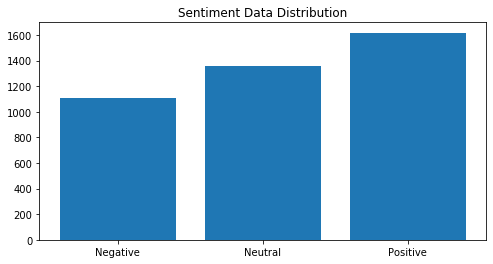

In [42]:
plt.figure(figsize=(8,4))
count_pos = news_data['Cum'].value_counts()[1]
count_ntl = news_data['Cum'].value_counts()[0]
count_neg = news_data['Cum'].value_counts()[-1]

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")